In [2]:
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import plotly.express as px
import geopandas as gpd

In [5]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/Rental_USA_csv.csv')
# Read the csv file
rental_df = pd.read_csv(file_path)
# Display data
rental_df.head()


,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [6]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'price'

# Convert all values to float except the specified object column
rental_df_clean = rental_df.replace(',','', regex = True)
rental_df_clean.loc[:, rental_df_clean.columns != object_column] = rental_df_clean.loc[:, rental_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
#homelesess_df_numeric = homelesess_df_clean.apply(pd.to_numeric, errors='coerce')
rental_df_clean.head()

,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [7]:
#Renaming columns
rental_df_clean = rental_df_clean.rename(columns={'Unnamed: 12' : 'rental_2021', 'Unnamed: 13': 'rental_2022',
       'Unnamed: 3' : 'rental_2012', 'Unnamed: 4' : 'rental_2013',
       'Unnamed: 5' : 'rental_2014', 'Unnamed: 6' : 'rental_2015',
       'Unnamed: 7' : 'rental_2016', 'Unnamed: 8' : 'rental_2017',
       'Unnamed: 9' : 'rental_2018', 'Unnamed: 10' : 'rental_2019',
       'Unnamed: 11': 'rental_2020','price': 'State' })


In [8]:
#Deleting data not needed
del rental_df_clean['Unnamed: 1']
del rental_df_clean['Unnamed: 2']
rental_df_clean = rental_df_clean.drop(0)
rental_df_clean.head()

,State,rental_2012,rental_2013,rental_2014,rental_2015,rental_2016,rental_2017,rental_2018,rental_2019,rental_2020,rental_2021,rental_2022
1,AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
5,CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


Enter the year in a range 2012 - 2022:  2015


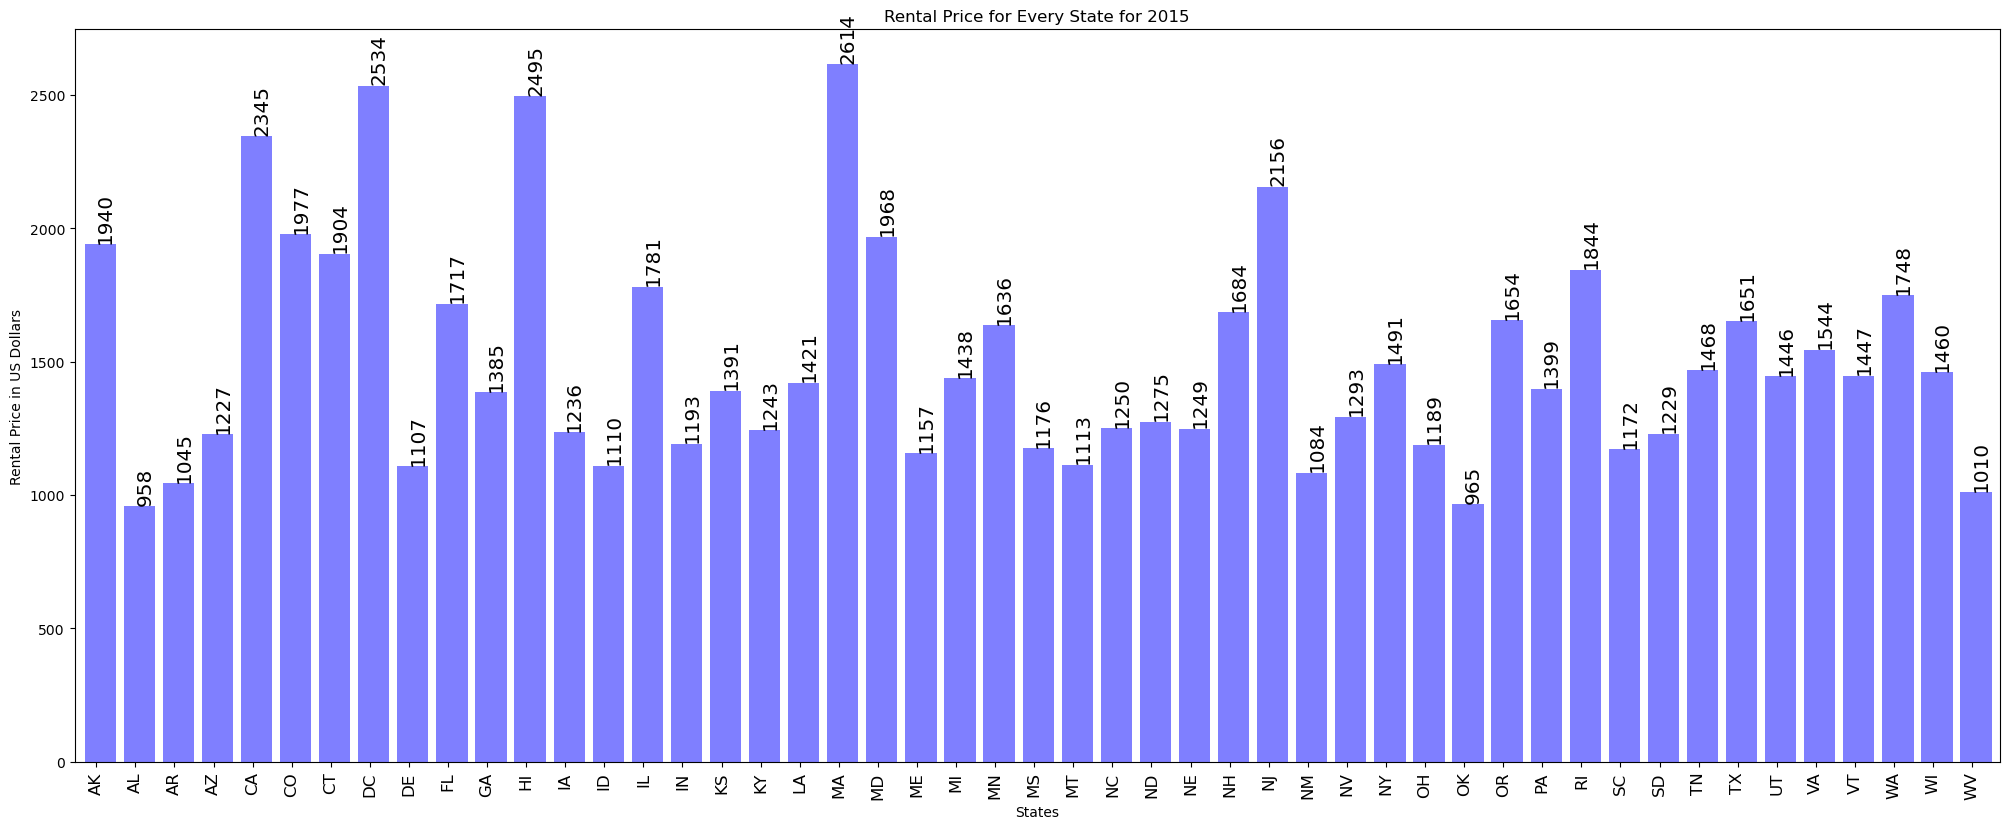

In [9]:
x_axis = np.arange(len(rental_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "rental_" + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, rental_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , rental_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
plt.title(f"Rental Price for Every State for {value_for_year}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
y = rental_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 20,
             str(value), size = 'x-large',rotation="vertical")
plt.savefig("HUD_bar_chat.png")
plt.show()

In [12]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in rental_df_clean.columns:
    rental_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
rental_df_yearly = rental_df_clean.rename(columns={'rental_2022' : '2022', 'rental_2021': '2021',
       'rental_2020' : '2020', 'rental_2019' : '2019',
       'rental_2018' : '2018', 'rental_2017' : '2017',
       'rental_2016' : '2016', 'rental_2015' : '2015',
       'rental_2014': '2014', 'rental_2013' : '2013',
       'rental_2012': '2012'})
rental_df_yearly.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,
AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


In [13]:
year_array = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# Specify the columns for which to calculate the rental average 
columns_to_sum = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']

# Calculate the sum for specific columns
specific_column_sums = rental_df_yearly[columns_to_sum].mean()

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums).round()
# Create a DataFrame from the arrays
usa_rental_df = pd.DataFrame({'Year': year_array , 'Average Rental in US': sums_array})

usa_rental_df

,Year,Average Rental in US
0,2012,1361.0
1,2013,1417.0
2,2014,1460.0
3,2015,1507.0
4,2016,1530.0
5,2017,1528.0
6,2018,1581.0
7,2019,1621.0
8,2020,1600.0
9,2021,1881.0


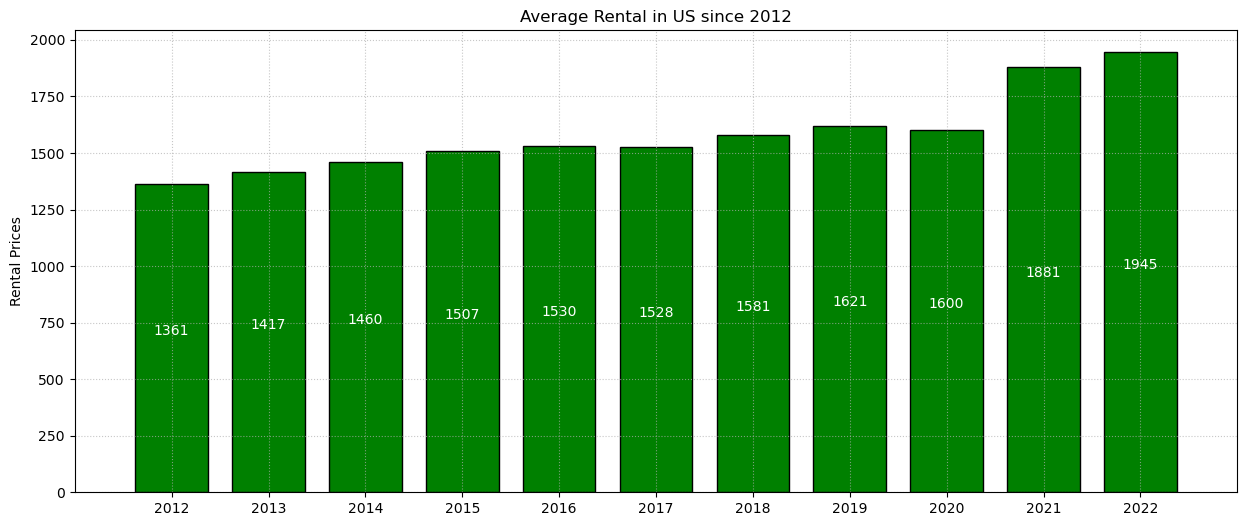

In [14]:
# Rental Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_rental_df["Year"]
y = usa_rental_df["Average Rental in US"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Rental Prices')
plt.title('Average Rental in US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_rental_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/rental_Summary.png")

# Show graph
plt.show()

In [15]:
#Enter state code to plot graph
state_value = input('Enter state code in two letters format: ')
# Collect the homelesess number
average_rental = rental_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_rental.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, rental_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=rental_df_yearly.loc[state_value])

# Create a legend for our chart
plt.legend(title = state_value, loc="best")
plt.title(f"Rental Price for State {state_value}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
plt.savefig("../Outputs/rental_state_graph")
# Show the chart
plt.show()

Enter state code in two letters format:  la


KeyError: 'la'

NameError: name 'state_averages_df' is not defined

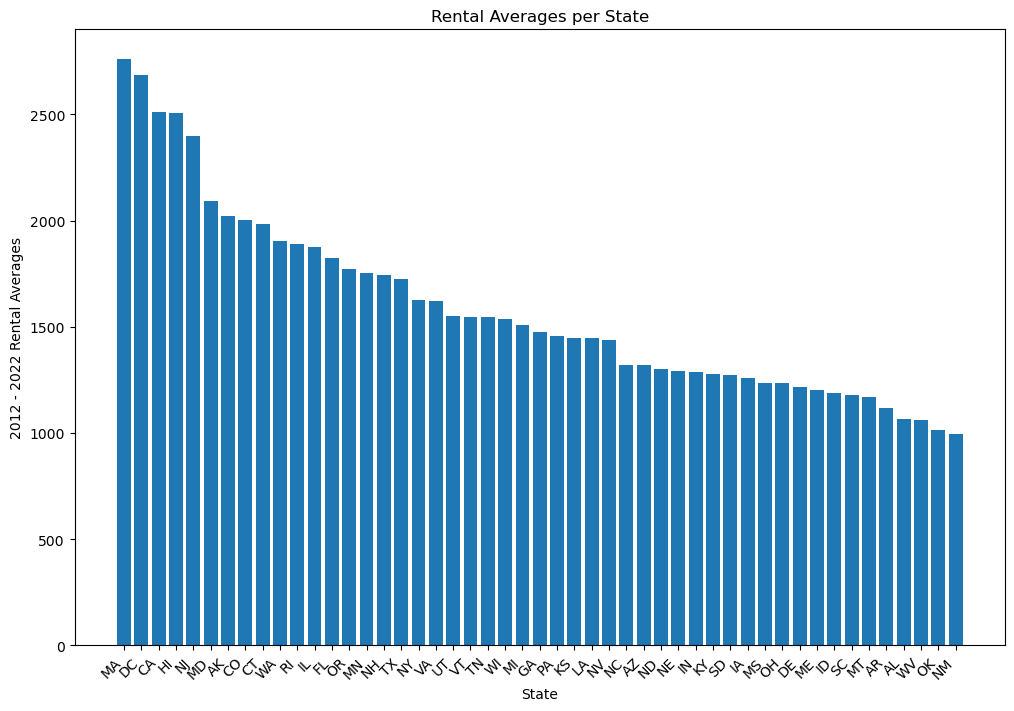

In [17]:

state_averages = rental_df_yearly.mean(axis=1).round()

# Add a "State" column based on the index (assuming the states are in the index)
state_averages_df = pd.DataFrame({"2012 - 2022 Rental Averages": state_averages, "State": rental_df_yearly.index})

# Sort the DataFrame by the rental averages in descending order
state_averages_df = state_averages_df.sort_values(by="2012 - 2022 Rental Averages", ascending=False)

# Increase figure size and adjust bar width
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.8  # Adjust as needed

# Plotting the bar graph with adjusted bar width
bars = ax.bar(state_averages_df["State"], state_averages_df["2012 - 2022 Rental Averages"], width=bar_width)

plt.title("Rental Averages per State")
plt.xlabel("State")
plt.ylabel("2012 - 2022 Rental Averages")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/rental_averages_per_state")

# Show the chart
plt.show()



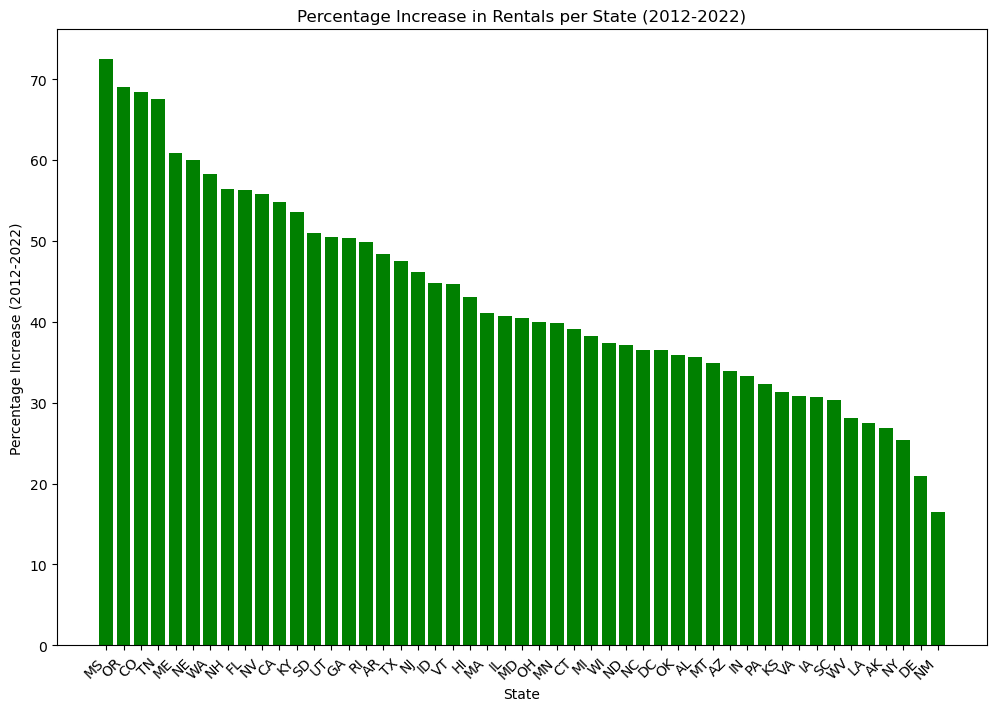

In [21]:
# Calculate percentage increase
percentage_increase = ((rental_df_yearly.iloc[:, -1] - rental_df_yearly.iloc[:, 0]) / rental_df_yearly.iloc[:, 0] * 100).round(2)

# Create a DataFrame with State and Percentage Increase columns
percentage_increase_df = pd.DataFrame({"Percentage Increase (2012-2022)": percentage_increase, "State": rental_df_yearly.index})

# Sort the DataFrame by the percentage increase in descending order
percentage_increase_df = percentage_increase_df.sort_values(by="Percentage Increase (2012-2022)", ascending=False)

# Increase figure size and adjust bar width
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.8  # Adjust as needed

# Plotting the bar graph with adjusted bar width
bars = ax.bar(percentage_increase_df["State"], percentage_increase_df["Percentage Increase (2012-2022)"], width=bar_width, color='green')

plt.title("Percentage Increase in Rentals per State (2012-2022)")
plt.xlabel("State")
plt.ylabel("Percentage Increase (2012-2022)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/rental_percentage_increase_per_state")

# Show the chart
plt.show()


In [22]:
rental_df_yearly.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,
AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143
